In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [2]:
dfTrain = pd.read_csv("train.csv")
dfTest = pd.read_csv("test.csv")
dfGender = pd.read_csv("gender_submission.csv")

In [3]:
df = pd.concat([dfTrain, dfTest], axis = 0)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
for col in df.columns:
    print("Column name: ", col, " --- Unique value counts: ", df[col].nunique())

Column name:  PassengerId  --- Unique value counts:  1309
Column name:  Survived  --- Unique value counts:  2
Column name:  Pclass  --- Unique value counts:  3
Column name:  Name  --- Unique value counts:  1307
Column name:  Sex  --- Unique value counts:  2
Column name:  Age  --- Unique value counts:  98
Column name:  SibSp  --- Unique value counts:  7
Column name:  Parch  --- Unique value counts:  8
Column name:  Ticket  --- Unique value counts:  929
Column name:  Fare  --- Unique value counts:  281
Column name:  Cabin  --- Unique value counts:  186
Column name:  Embarked  --- Unique value counts:  3


In [9]:
# Set index using passenger IDs
df = df.set_index("PassengerId")

# Data Visualization

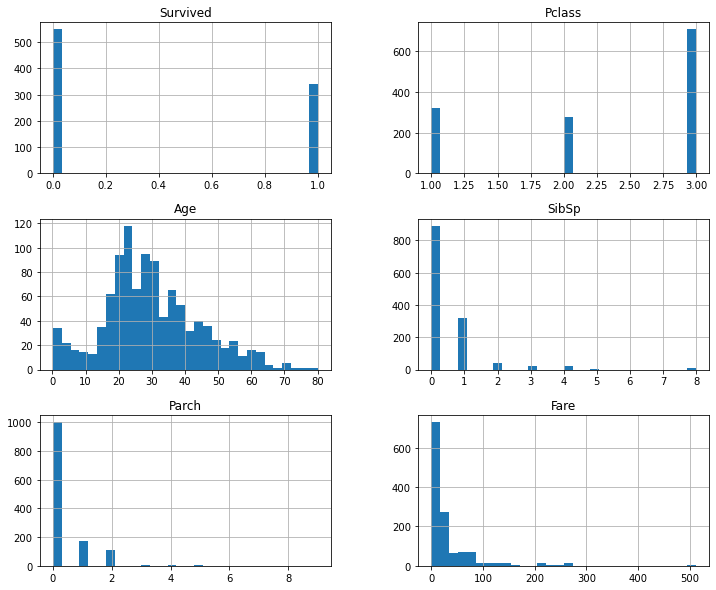

In [10]:
df.hist(bins=30, figsize=(12, 10))
plt.show()

# Data Transformation

In [11]:
# Create column LastName
df['LastName'] = df['Name'].str.split(', ').str[0]

df['LastName'].head()

PassengerId
1       Braund
2      Cumings
3    Heikkinen
4     Futrelle
5        Allen
Name: LastName, dtype: object

In [12]:
# Cretae column Title
nameSplit = df['Name'].str.split(', ').str[1]
df['Title'] = nameSplit.str.split('.').str[0]

df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Lady              1
Mme               1
Jonkheer          1
Sir               1
Dona              1
Don               1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [13]:
# Regroup some titles
mrs = ['Lady', 'Mlle']
miss = ['Dona', 'the Countess', 'Mme', 'Ms']
mr = ['Jonkheer', 'Don']
noble = ['Dr', 'Col', 'Major', 'Capt', 'Sir', 'Rev', 'Master']
df.loc[df.Title.isin(mrs), 'Title'] = 'Mrs'
df.loc[df.Title.isin(miss), 'Title'] = 'Miss'
df.loc[df.Title.isin(mr), 'Title'] = 'Mr'
df.loc[df.Title.isin(noble), 'Title'] = 'Noble'

df['Title'].value_counts()

Mr       759
Miss     265
Mrs      200
Noble     85
Name: Title, dtype: int64

In [14]:
# Fill Age missing values
mean_age = df['Age'].mean()

df['Age'] = df['Age'].fillna(value = mean_age)

In [15]:
# Create column CabinGroup using first letter of Cabin
df['CabinGroup'] = df['Cabin'].astype('str').str[0]
df['CabinGroup'] = df['CabinGroup'].str.upper()

df['CabinGroup'].value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: CabinGroup, dtype: int64

In [16]:
# Examine the survival rate of Cabin Groups
df.groupby('CabinGroup')['Survived'].aggregate('mean')

CabinGroup
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
N    0.299854
T    0.000000
Name: Survived, dtype: float64

In [17]:
# Remove Fare 0 and replace with NaN
df.loc[df.Fare.eq(0), 'Fare'] = np.nan

# Split ticket by series and number
df['TicketSeries'] = [i[0] if len(i) > 1 else 0 for i in df.Ticket.str.split()]
df['TicketNumber'] = [i[-1] for i in df.Ticket.str.split()]

In [18]:
# Create column price = ticket number / number of passenger with same number
ticketDict = df.groupby('TicketNumber')['LastName'].count().to_dict()

df['Price'] = df.Fare / df['TicketNumber'].map(ticketDict)

<AxesSubplot:>

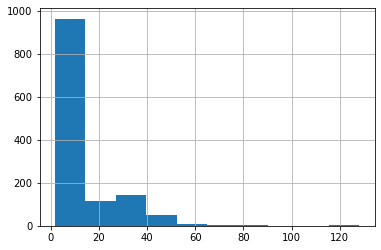

In [19]:
df['Price'].hist()

In [20]:
df.groupby(['Pclass', 'CabinGroup'])['Price'].describe()

count       mean        std        min        25%  \
Pclass CabinGroup                                                      
1      A            21.0  32.818748   7.058487  26.000000  27.720800   
       B            62.0  41.543635  24.062267   5.000000  28.989600   
       C            94.0  35.949407   9.950084  25.258333  27.720825   
       D            40.0  30.022813   5.741721  19.700000  25.986100   
       E            34.0  26.544241   4.570400   8.795833  26.550000   
       N            64.0  32.922205  15.776900  13.275000  26.000000   
       T             1.0  35.500000        NaN  35.500000  35.500000   
2      D             6.0  13.595833   0.829640  12.875000  13.000000   
       E             4.0  10.275000   3.513427   5.250000   9.187500   
       F            13.0  10.423077   1.607441   8.666667   9.750000   
       N           248.0  11.661995   2.083982   5.250000  10.500000   
3      E             3.0   6.841667   1.046447   6.237500   6.237500   
       F             8.0   7.532646   0.204545   7.229200   7.396875   
       G             5.0   5.432500   0.183715   5.231250   5.231250   
       N           688.0   7.359087   1.408806   1.807300   7.061975   

                         50%        75%         max  
Pclass CabinGroup                                    
1      A           30.500000  35.500000   50.495800  
       B           36.491071  44.779700  128.082300  
       C           33.604163  43.450000   68.389600  
       D           26.550000  37.625000   39.133350  
       E           26.900000  27.719433   38.500000  
       N           27.720800  38.011607  128.082300  
       T           35.500000  35.500000   35.500000  
2      D           13.395850  13.844800   15.045800  
       E           11.425000  12.512500   13.000000  
       F            9.750000  10.500000   13.000000  
       N           12.806250  13.000000   16.000000  
3      E            6.237500   7.143750    8.050000  
       F            7.650000   7.650000    7.750000  
       G            5.566667   5.566667    5.566667  
       N            7.750000   7.925000   19.966700

In [21]:
# Check Price missing value
ticket = df[df.Price.isna()]

ticket[['Pclass', 'Cabin', 'TicketNumber', 'Price']]

,Pclass,Cabin,TicketNumber,Price
PassengerId,,,,
180,3,NaN,LINE,NaN
264,1,B94,112059,NaN
272,3,NaN,LINE,NaN
278,2,NaN,239853,NaN
303,3,NaN,LINE,NaN
414,2,NaN,239853,NaN
467,2,NaN,239853,NaN
482,2,NaN,239854,NaN
598,3,NaN,LINE,NaN


In [22]:
# Check Price outliers
df.loc[df.Price > 100,]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,CabinGroup,TicketSeries,TicketNumber,Price
PassengerId,,,,,,,,,,,,,,,,,
259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward,Miss,N,PC,17755,128.0823
680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza,Mr,B,PC,17755,128.0823
738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer,Mr,B,PC,17755,128.0823
1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza,Mrs,B,PC,17755,128.0823


In [23]:
priceDf = df.groupby(['Pclass', 'CabinGroup'])['Price'].mean().reset_index()
priceDf

,Pclass,CabinGroup,Price
0,1,A,32.818748
1,1,B,41.543635
2,1,C,35.949407
3,1,D,30.022813
4,1,E,26.544241
5,1,N,32.922205
6,1,T,35.500000
7,2,D,13.595833
8,2,E,10.275000
9,2,F,10.423077


In [24]:
# Replace outliers with mean price
mean_1b = priceDf

df.loc[df.TicketNumber.eq('17755'), 'Price'] = mean_1b

# Impute missing prices
for index, row in df.loc[df.Price.isna(), ['Pclass', 'CabinGroup']].iterrows():
    new_price = priceDf.loc[priceDf.Pclass.eq(row.Pclass) & priceDf.CabinGroup.eq(row.CabinGroup)].Price.mean()
    df.loc[[index], 'Price'] = new_price

In [25]:
# Fill Embark missing values
mode_embarked = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(value = mode_embarked[0])

In [26]:
# Create column FamilyOnBoard

df['FamilyOnBoard'] = df['SibSp'] + df['Parch']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    float64
 1   Pclass         1309 non-null   int64  
 2   Name           1309 non-null   object 
 3   Sex            1309 non-null   object 
 4   Age            1309 non-null   float64
 5   SibSp          1309 non-null   int64  
 6   Parch          1309 non-null   int64  
 7   Ticket         1309 non-null   object 
 8   Fare           1291 non-null   float64
 9   Cabin          295 non-null    object 
 10  Embarked       1309 non-null   object 
 11  LastName       1309 non-null   object 
 12  Title          1309 non-null   object 
 13  CabinGroup     1309 non-null   object 
 14  TicketSeries   1309 non-null   object 
 15  TicketNumber   1309 non-null   object 
 16  Price          1309 non-null   float64
 17  FamilyOnBoard  1309 non-null   int64  
dtypes: float

In [28]:
# Correlation to Survived
df.corr()['Survived'].sort_values(ascending=False)

Survived         1.000000
Price            0.269999
Fare             0.252453
Parch            0.081629
FamilyOnBoard    0.016639
SibSp           -0.035322
Age             -0.070323
Pclass          -0.338481
Name: Survived, dtype: float64

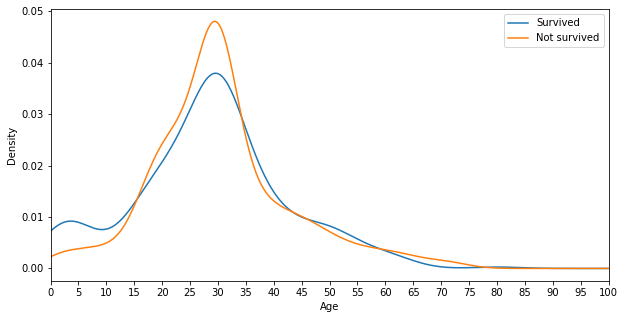

In [29]:
# Plot Survived status vs Age
survived = df[df['Survived'].eq(1)]
survivedNot = df[df['Survived'].eq(0)]

plt.figure(figsize=(10, 5))
survived['Age'].plot(kind='kde', label='Survived')
survivedNot['Age'].plot(kind='kde', label='Not survived')
plt.xlim(0,100)
plt.xticks(np.arange(0, 101, 5))
plt.legend()
plt.xlabel('Age')

plt.show()

In [30]:
# Create column Age Group
# 0-15 : Group 0
# 15-35 : Group 1
# 35+ : Group 2

df['AgeGroup'] = pd.cut(x = df.Age, labels = [0,1,2], bins=[-1, 15, 35, df.Age.max()])

df.AgeGroup.value_counts()

1    872
2    322
0    115
Name: AgeGroup, dtype: int64

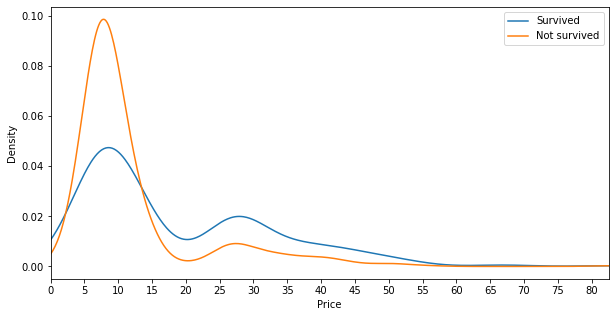

In [31]:
# Plot Survived status vs Price
survived = df[df['Survived'].eq(1)]
survivedNot = df[df['Survived'].eq(0)]

plt.figure(figsize=(10, 5))
survived['Price'].plot(kind='kde', label='Survived')
survivedNot['Price'].plot(kind='kde', label='Not survived')
plt.xlim(0,df.Price.max())
plt.xticks(np.arange(0, df.Price.max()+1, 5))
plt.legend()
plt.xlabel('Price')

plt.show()

In [32]:
# Create Price Group
# 0-13 : Group 0
# 13-58 : Group 1
# 58+: Group 2

df['PriceGroup'] = pd.cut(x = df.Price, labels = [0,1,2], bins=[-1, 13, 58, df.Price.max()])

df.PriceGroup.value_counts()

0    955
1    347
2      7
Name: PriceGroup, dtype: int64

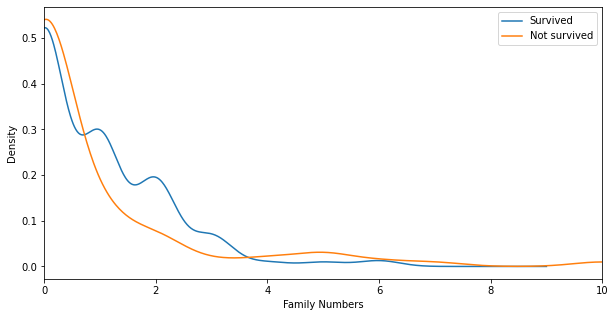

In [33]:
# Plot Survived status vs FamilyOnBoard
survived = df[df['Survived'].eq(1)]
survivedNot = df[df['Survived'].eq(0)]

plt.figure(figsize=(10, 5))
survived['FamilyOnBoard'].plot(kind='kde', label='Survived')
survivedNot['FamilyOnBoard'].plot(kind='kde', label='Not survived')
plt.xlim(0,df.FamilyOnBoard.max())
plt.legend()
plt.xlabel('Family Numbers')

plt.show()

In [34]:
# Create FamilySizeGroup
# 0-1: Group 0
# 1-4: Group 1
# 4+: Group 2

df['FamilySizeGroup'] = pd.cut(x = df.FamilyOnBoard, labels = [0,1,2], bins=[-1, 1, 4, df.FamilyOnBoard.max()])

df.FamilySizeGroup.value_counts()

0    1025
1     224
2      60
Name: FamilySizeGroup, dtype: int64

In [35]:
# Apply np.log to normalize the skewed right Price
df.Price = df.Price.apply(np.log1p)

In [36]:
# Drop unused columns

df = df.drop(columns=['Name', 'LastName', 'Ticket', 'Cabin', 'TicketSeries', 'TicketNumber', 'Fare'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         891 non-null    float64 
 1   Pclass           1309 non-null   int64   
 2   Sex              1309 non-null   object  
 3   Age              1309 non-null   float64 
 4   SibSp            1309 non-null   int64   
 5   Parch            1309 non-null   int64   
 6   Embarked         1309 non-null   object  
 7   Title            1309 non-null   object  
 8   CabinGroup       1309 non-null   object  
 9   Price            1309 non-null   float64 
 10  FamilyOnBoard    1309 non-null   int64   
 11  AgeGroup         1309 non-null   category
 12  PriceGroup       1309 non-null   category
 13  FamilySizeGroup  1309 non-null   category
dtypes: category(3), float64(3), int64(4), object(4)
memory usage: 159.2+ KB


In [37]:
# Define numerical and cateforical columns
num_col = ['Age', 'SibSp', 'Parch', 'Price', 'FamilyOnBoard']
cat_col = ['Pclass', 'Sex', 'CabinGroup', 'Embarked', 'AgeGroup', 'PriceGroup', 'FamilySizeGroup', 'Title']

In [38]:
# One Hot Encoding for categorical columns
le = OneHotEncoder()
le.fit(df[cat_col])

OneHotEncoder()

In [39]:
df = pd.get_dummies(df, columns=cat_col)

dfTrain = df[0:891]
dfTest = df[891:]

In [40]:
dfTrain

,Survived,Age,SibSp,Parch,Price,FamilyOnBoard,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,PriceGroup_0,PriceGroup_1,PriceGroup_2,FamilySizeGroup_0,FamilySizeGroup_1,FamilySizeGroup_2,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,22.000000,1,0,2.110213,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,1.0,38.000000,1,0,3.601186,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1.0,26.000000,0,0,2.188856,0,0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
4,1.0,35.000000,1,0,3.316003,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5,0.0,35.000000,0,0,2.202765,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0.0,27.000000,0,0,2.639057,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
888,1.0,19.000000,0,0,3.433987,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
889,0.0,29.881138,1,2,1.926072,3,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0


In [41]:
dfTest = dfTest.drop(columns=['Survived'])

dfTest

,Age,SibSp,Parch,Price,FamilyOnBoard,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,PriceGroup_0,PriceGroup_1,PriceGroup_2,FamilySizeGroup_0,FamilySizeGroup_1,FamilySizeGroup_2,Title_Miss,Title_Mr,Title_Mrs,Title_Noble
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.500000,0,0,2.178064,0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
893,47.000000,1,0,2.079442,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
894,62.000000,0,0,2.369075,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
895,27.000000,0,0,2.268252,0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
896,22.000000,1,1,1.966238,2,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,29.881138,0,0,2.202765,0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1306,39.000000,0,0,3.618993,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1307,38.500000,0,0,2.110213,0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0


In [42]:
# Normalization for numeric columns
sc = StandardScaler()

dfTrain[num_col] = sc.fit_transform(dfTrain[num_col])
dfTest[num_col] = sc.fit_transform(dfTest[num_col])

<ipython-input-42-1d37379bbc87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTrain[num_col] = sc.fit_transform(dfTrain[num_col])
/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [43]:
X = dfTrain.drop(columns=['Survived'])
Y = dfTrain['Survived']
X_test = dfTest

X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size = 0.2, random_state = 10)

# Model 1: Random Forest Classifier

In [44]:
rf_clf = RandomForestClassifier()

param = {'n_estimators': [1000, 2000, 5000],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [5, 8, 10],
        'min_samples_leaf': [3, 5, 8]
        }

rf_clf_cv = GridSearchCV(rf_clf, param_grid = param, scoring = 'accuracy', cv=5, verbose=2)
rf_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=2000; total time=   1.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=2000; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=2000; total time=   1.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=2000; total time=   1.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, n_estimators=200

/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.3s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.3s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=3, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=5, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=8, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=3, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=5, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=1000; total time=   0.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=2000; total time=   0.4s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=2000; total time=   0.5s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=5000; total time=   1.2s


/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/yaowhuichong/opt/anaconda3/lib/python3.8

[CV] END criterion=log_loss, max_depth=10, min_samples_leaf=8, n_estimators=5000; total time=   1.1s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 8, 10], 'min_samples_leaf': [3, 5, 8],
                         'n_estimators': [1000, 2000, 5000]},
             scoring='accuracy', verbose=2)

In [45]:
rf_clf = RandomForestClassifier(**rf_clf_cv.best_params_)

rf_clf.fit(X_train, Y_train)
Y_pred_rf_train = rf_clf.predict(X_train)
Y_pred_rf_dev = rf_clf.predict(X_dev)
acc_rf_train = accuracy_score(Y_pred_rf_train, Y_train)
acc_rf_dev = accuracy_score(Y_pred_rf_dev, Y_dev)

# Model 2: Gradient Boosting Classifier

In [46]:
gb_clf = GradientBoostingClassifier()

param = {
        'n_estimators': [1000, 2000, 5000],
        'min_samples_leaf': [3, 5, 8],
        'max_depth': [3, 5, 8],
        'max_features': ['auto']
        }

gb_clf_cv = GridSearchCV(rf_clf, param_grid = param, scoring = 'accuracy', cv=5, verbose=2)
gb_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, n_estimators=1000; total time=   0.9s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, n_estimators=2000; total time=   1.8s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, n_estimators=2000; total time=   1.8s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, n_estimators=2000; total time=   1.9s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=3, n_estimators=2000; total time=   1.8s
[CV] END max_depth=3, max_features=auto, min_sa

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, min_samples_leaf=3,
                                              n_estimators=1000),
             param_grid={'max_depth': [3, 5, 8], 'max_features': ['auto'],
                         'min_samples_leaf': [3, 5, 8],
                         'n_estimators': [1000, 2000, 5000]},
             scoring='accuracy', verbose=2)

In [47]:
gb_clf = GradientBoostingClassifier(**gb_clf_cv.best_params_)

gb_clf.fit(X_train, Y_train)
Y_pred_gb_train = gb_clf.predict(X_train)
Y_pred_gb_dev = gb_clf.predict(X_dev)
acc_gb_train = accuracy_score(Y_pred_gb_train, Y_train)
acc_gb_dev = accuracy_score(Y_pred_gb_dev, Y_dev)

# Model 3: Support Vector Classifier

In [48]:
svc_clf = SVC()

param = {
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'gamma': [0.1, 1, 10, 100],
        'C': [0.1, 1, 10, 100],
        }

svc_clf_cv = GridSearchCV(svc_clf, param_grid = param, scoring = 'accuracy', cv=5, verbose=2)
svc_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [49]:
svc_clf = SVC(**svc_clf_cv.best_params_)

svc_clf.fit(X_train, Y_train)
Y_pred_svc_train = svc_clf.predict(X_train)
Y_pred_svc_dev = svc_clf.predict(X_dev)
acc_svc_train = accuracy_score(Y_pred_svc_train, Y_train)
acc_svc_dev = accuracy_score(Y_pred_svc_dev, Y_dev)

# Model 4: Cat Boost Classifier

In [50]:
cb_clf = CatBoostClassifier()

param = {
         'verbose': [False],
         'thread_count': [-1],
         'depth': [3, 4, 5, 6],
         'iterations': [500, 1000, 2000, 3000],
         'learning_rate': [0.0001, 0.001, 0.01]
        }

cb_clf_cv = GridSearchCV(cb_clf, param_grid = param, scoring = 'accuracy', cv=5, verbose=2)
cb_clf_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END depth=3, iterations=500, learning_rate=0.0001, thread_count=-1, verbose=False; total time=   0.3s
[CV] END depth=3, iterations=500, learning_rate=0.0001, thread_count=-1, verbose=False; total time=   0.2s
[CV] END depth=3, iterations=500, learning_rate=0.0001, thread_count=-1, verbose=False; total time=   0.2s
[CV] END depth=3, iterations=500, learning_rate=0.0001, thread_count=-1, verbose=False; total time=   0.2s
[CV] END depth=3, iterations=500, learning_rate=0.0001, thread_count=-1, verbose=False; total time=   0.3s
[CV] END depth=3, iterations=500, learning_rate=0.001, thread_count=-1, verbose=False; total time=   0.3s
[CV] END depth=3, iterations=500, learning_rate=0.001, thread_count=-1, verbose=False; total time=   0.3s
[CV] END depth=3, iterations=500, learning_rate=0.001, thread_count=-1, verbose=False; total time=   0.3s
[CV] END depth=3, iterations=500, learning_rate=0.001, thread_count=-1, verbose=False

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x120fe13d0>,
             param_grid={'depth': [3, 4, 5, 6],
                         'iterations': [500, 1000, 2000, 3000],
                         'learning_rate': [0.0001, 0.001, 0.01],
                         'thread_count': [-1], 'verbose': [False]},
             scoring='accuracy', verbose=2)

In [51]:
cb_clf = CatBoostClassifier(**cb_clf_cv.best_params_)

cb_clf.fit(X_train, Y_train)
Y_pred_cb_train = cb_clf.predict(X_train)
Y_pred_cb_dev = cb_clf.predict(X_dev)
acc_cb_train = accuracy_score(Y_pred_cb_train, Y_train)
acc_cb_dev = accuracy_score(Y_pred_cb_dev, Y_dev)

# Selecting Model With Highest Accuracy

In [52]:
models =['Random Forest', 'Gradient Boosting Classifier', 'Support Vector Kernel', 'Cat Boost Classifier']
acc_train = [acc_rf_train, acc_gb_train, acc_svc_train, acc_cb_train]
acc_dev = [acc_rf_dev, acc_gb_dev, acc_svc_dev, acc_cb_dev]

models_cv_scores = pd.DataFrame({'Model': models, 'Train_Set_Accuracy': acc_train, 'Dev_Set_Accuracy': acc_dev,})
models_cv_scores

,Model,Train_Set_Accuracy,Dev_Set_Accuracy
0,Random Forest,0.859551,0.860335
1,Gradient Boosting Classifier,0.991573,0.782123
2,Support Vector Kernel,0.835674,0.849162
3,Cat Boost Classifier,0.880618,0.837989


In [53]:
acc_max = models_cv_scores['Dev_Set_Accuracy'].max()
idx = models_cv_scores['Dev_Set_Accuracy'].idxmax()
model_max = models_cv_scores.iloc[idx,0]

print("The best model is: ", model_max, ", with an Accuracy of", acc_max)

The best model is:  Random Forest , with an Accuracy of 0.8603351955307262


In [58]:
y_pred = rf_clf.predict(X_test)

In [59]:
dfGender['Survived'] = list(map(int, y_pred))
dfGender.to_csv("Submission.csv", index=False)